## Submission Info

* Student name: Kamile Yagci
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:

## Part 2 Content
* Import Libraries
* Load myData CSV File
* Q1: Is there a correlation between the production budget and the profit?
* Q2: Is there a correlation between the ratings and the profit?
* Q3: Which directors and writers make the most profit (High Budget)?
* Q4: Which actors and actresses make the most profit (High Budget)?
* Q5: Which genres make the most profit (High Budget)?

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from functions import *

/Users/kamileyagci/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load myData CSV File

In [2]:
#myData.csv file is created in Part 1 python file. It combined all required data.
df = pd.read_csv('zippedData/myData.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53305 entries, 0 to 53304
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         53305 non-null  int64  
 1   release_date       53305 non-null  object 
 2   movie              53305 non-null  object 
 3   production_budget  53305 non-null  float64
 4   domestic_gross     53305 non-null  float64
 5   worldwide_gross    53305 non-null  float64
 6   tconst             53305 non-null  object 
 7   genres             53265 non-null  object 
 8   averagerating      53305 non-null  float64
 9   numvotes           53305 non-null  int64  
 10  nconst             53305 non-null  object 
 11  category           53305 non-null  object 
 12  characters         21488 non-null  object 
 13  primary_name       53305 non-null  object 
 14  death_year         1243 non-null   float64
 15  release_year       53305 non-null  int64  
 16  profit_gross       533

In [3]:
#df[df.primary_name =='Emma Thompson']

## Q1: Is there a correlation between the production budget and the profit?

In [3]:
selected_columns1 = ['movie', 'production_budget', 'averagerating', 'profit_gross', 'profit_rate', 'release_year']
df1 = df[selected_columns1].copy()

#Remove duplicate movies
df1.drop_duplicates(subset='movie', keep='first', inplace=True)

#Remove outliers with very low budget and very high profit_rate
df1.drop(df1[(df1.production_budget <1000000) | (df1.profit_rate >30)].index, inplace=True)

# Remove movies with release year before 1990
df1.drop(df1[df1.release_year < 1990].index, inplace=True)

print(df1.shape)
df1.head(10)

(1733, 6)


,movie,production_budget,averagerating,profit_gross,profit_rate,release_year
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.6,6.350639e+08,2.546673,2011
30,Dark Phoenix,350000000.0,6.0,-2.002376e+08,0.427892,2019
60,Avengers: Age of Ultron,330600000.0,7.3,1.072414e+09,4.243841,2015
90,Avengers: Infinity War,300000000.0,8.5,1.748134e+09,6.827114,2018
91,Justice League,300000000.0,6.5,3.559452e+08,2.186484,2017
119,Spectre,300000000.0,6.8,5.796209e+08,2.932070,2015
180,The Dark Knight Rises,275000000.0,8.4,8.094391e+08,3.943415,2012
181,Solo: A Star Wars Story,275000000.0,7.0,1.181513e+08,1.429641,2018
192,John Carter,275000000.0,6.6,7.778100e+06,1.028284,2012
208,The Lone Ranger,275000000.0,6.4,-1.499788e+07,0.945462,2013


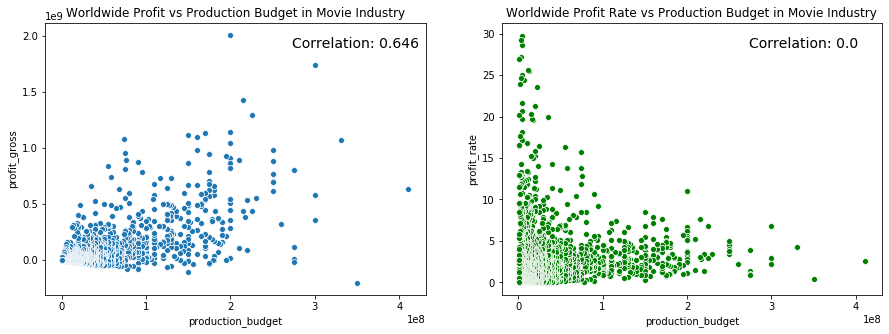

In [4]:
budget = df1['production_budget']
profit= df1['profit_gross']
profitRate = df1['profit_rate']

corr0 = round(profit.corr(budget), 3)
corr1 = round(profitRate.corr(budget), 3)
                    
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x=budget, y=profit)
axes[0].set_title('Worldwide Profit vs Production Budget in Movie Industry')
axes[0].text(0.65, 0.95,"Correlation: " + str(corr0), transform=axes[0].transAxes, fontsize=14, verticalalignment='top')

sns.scatterplot(ax=axes[1], x=budget, y=profitRate, color='green')
axes[1].set_title('Worldwide Profit Rate vs Production Budget in Movie Industry')
axes[1].text(0.65, 0.95,"Correlation: " + str(corr1), transform=axes[1].transAxes, fontsize=14, verticalalignment='top')

plt.savefig('figures/budget-profit1.png')

In [5]:
budget = df1['production_budget']
profitRate_1= df1[df1.production_budget<=20000000]['profit_rate']
profitRate_2= df1[(df1.production_budget>20000000) & (df1.production_budget<=100000000)]['profit_rate']
profitRate_3= df1[(df1.production_budget>100000000) & (df1.production_budget<=200000000)]['profit_rate']
profitRate_4= df1[(df1.production_budget>200000000)]['profit_rate']

profitRateList = [profitRate_1, profitRate_2, profitRate_3, profitRate_4]
corr = []
profit_median = []
profitRateList[0].corr(budget)

for plist in profitRateList:
    profit_median.append(round(plist.median(), 3))
    corr.append(round(plist.corr(budget), 3))

#print(corr)
#print(profit_mean)


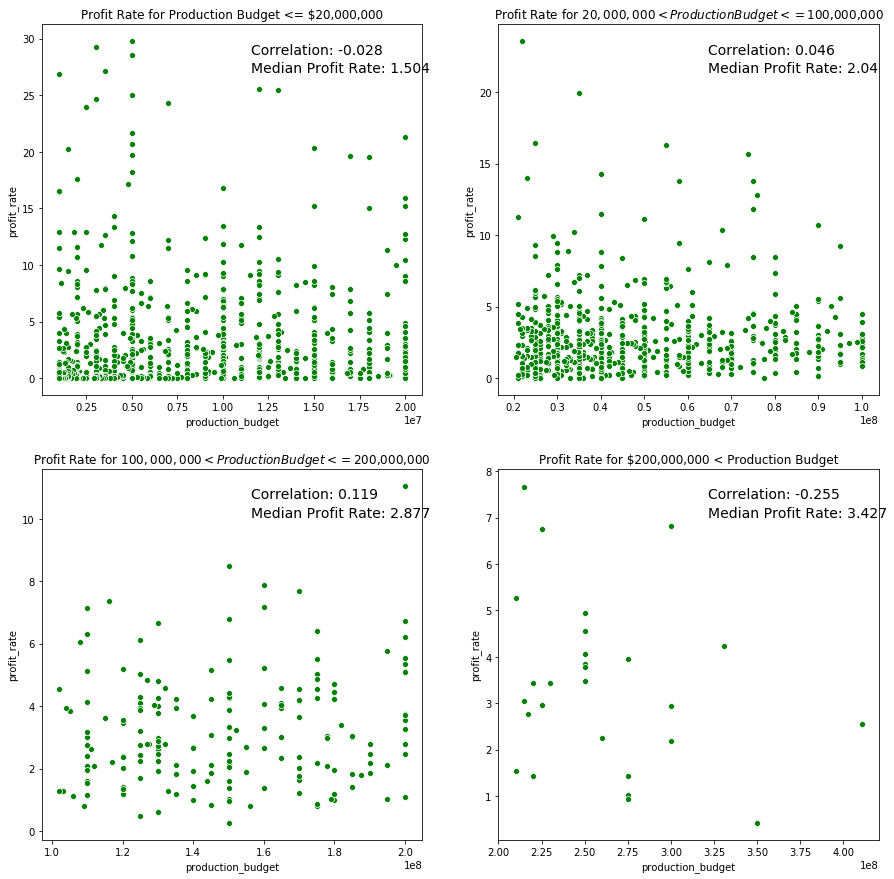

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

sns.scatterplot(ax=axes[0, 0], x=budget, y=profitRateList[0], color='green')
axes[0, 0].set_title('Profit Rate for Production Budget <= $20,000,000')
axes[0, 0].text(0.55, 0.95,"Correlation: " + str(corr[0]), transform=axes[0, 0].transAxes, fontsize=14, verticalalignment='top')
axes[0, 0].text(0.55, 0.90,"Median Profit Rate: " + str(profit_median[0]), transform=axes[0, 0].transAxes, fontsize=14, verticalalignment='top')

sns.scatterplot(ax=axes[0, 1], x=budget, y=profitRateList[1], color='green')
axes[0, 1].set_title('Profit Rate for $20,000,000 < Production Budget <= $100,000,000')
axes[0, 1].text(0.55, 0.95,"Correlation: " + str(corr[1]), transform=axes[0, 1].transAxes, fontsize=14, verticalalignment='top')
axes[0, 1].text(0.55, 0.90,"Median Profit Rate: " + str(profit_median[1]), transform=axes[0, 1].transAxes, fontsize=14, verticalalignment='top')

sns.scatterplot(ax=axes[1, 0], x=budget, y=profitRateList[2], color='green')
axes[1, 0].set_title('Profit Rate for $100,000,000 < Production Budget <= $200,000,000')
axes[1, 0].text(0.55, 0.95,"Correlation: " + str(corr[2]), transform=axes[1, 0].transAxes, fontsize=14, verticalalignment='top')
axes[1, 0].text(0.55, 0.90,"Median Profit Rate: " + str(profit_median[2]), transform=axes[1, 0].transAxes, fontsize=14, verticalalignment='top')

sns.scatterplot(ax=axes[1, 1], x=budget, y=profitRateList[3], color='green')
axes[1, 1].set_title('Profit Rate for $200,000,000 < Production Budget')
axes[1, 1].text(0.55, 0.95,"Correlation: " + str(corr[3]), transform=axes[1, 1].transAxes, fontsize=14, verticalalignment='top')
axes[1, 1].text(0.55, 0.90,"Median Profit Rate: " + str(profit_median[3]), transform=axes[1, 1].transAxes, fontsize=14, verticalalignment='top')

plt.savefig('figures/budget-profit2.png')

## Q2: Is there a correlation between the ratings and the profit?

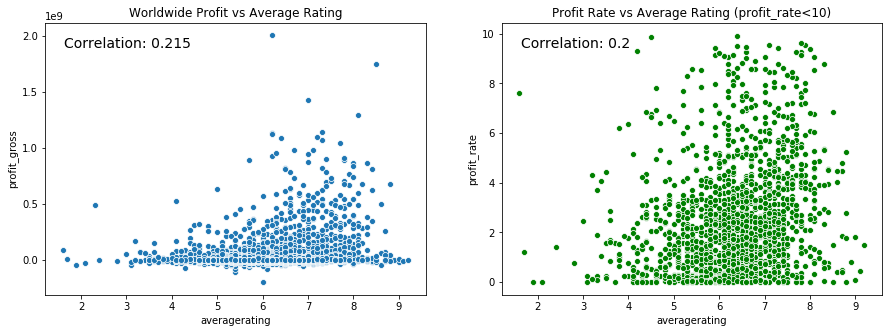

In [7]:
rating = df1['averagerating']
profit= df1['profit_gross']
profitRate = df1[df1.profit_rate < 10]['profit_rate'] # remove outliers

corr0 = round(profit.corr(rating), 3)
corr1 = round(profitRate.corr(rating), 3)
                    
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.scatterplot(ax=axes[0], x=rating, y=profit)
axes[0].set_title('Worldwide Profit vs Average Rating')
axes[0].text(0.05, 0.95,"Correlation: " + str(corr0), transform=axes[0].transAxes, fontsize=14, verticalalignment='top')

sns.scatterplot(ax=axes[1], x=rating, y=profitRate, color='green')
axes[1].set_title('Profit Rate vs Average Rating (profit_rate<10)')
axes[1].text(0.05, 0.95,"Correlation: " + str(corr1), transform=axes[1].transAxes, fontsize=14, verticalalignment='top')

plt.savefig('figures/rating-profit.png')

## Q3: Which directors and writers make the most profit?

In [8]:
# Copy dataframe with selected columns
selected_columns2 = ['category', 'primary_name', 'death_year', 'movie', 'production_budget', 'profit_gross', 'profit_rate', 'release_year']
df2 = df[selected_columns2].copy() ## Select columns

# Clean duplicates
df2.drop_duplicates(subset=None, keep='first', inplace=True)

#Select the movies with production_budget > $100,000,000
df2 = df2[(df2.production_budget > 100000000)]

# Remove the dead people
df2 = df2[df2.death_year.isnull()]

# Drop the movies with release year before 1990
df2.drop(df2[df2.release_year < 1990].index, inplace=True)

print(df2.shape)
df2.head(20)

(2158, 8)


,category,primary_name,death_year,movie,production_budget,profit_gross,profit_rate,release_year
0,writer,Tim Powers,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
1,director,Rob Marshall,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
2,writer,Ted Elliott,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
3,actor,Johnny Depp,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
7,actor,Ian McShane,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
8,writer,Jay Wolpert,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
10,actor,Geoffrey Rush,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
12,actress,Penélope Cruz,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
17,writer,Terry Rossio,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011
20,writer,Stuart Beattie,NaN,Pirates of the Caribbean: On Stranger Tides,410600000.0,6.350639e+08,2.546673,2011


Total number: 51
Best director List:  ['Jon Favreau', 'Joss Whedon', 'Sam Mendes', 'Joe Russo', 'Francis Lawrence', 'Anthony Russo', 'Lee Unkrich', 'Rich Moore', 'Michael Bay', 'Don Hall', 'Byron Howard']


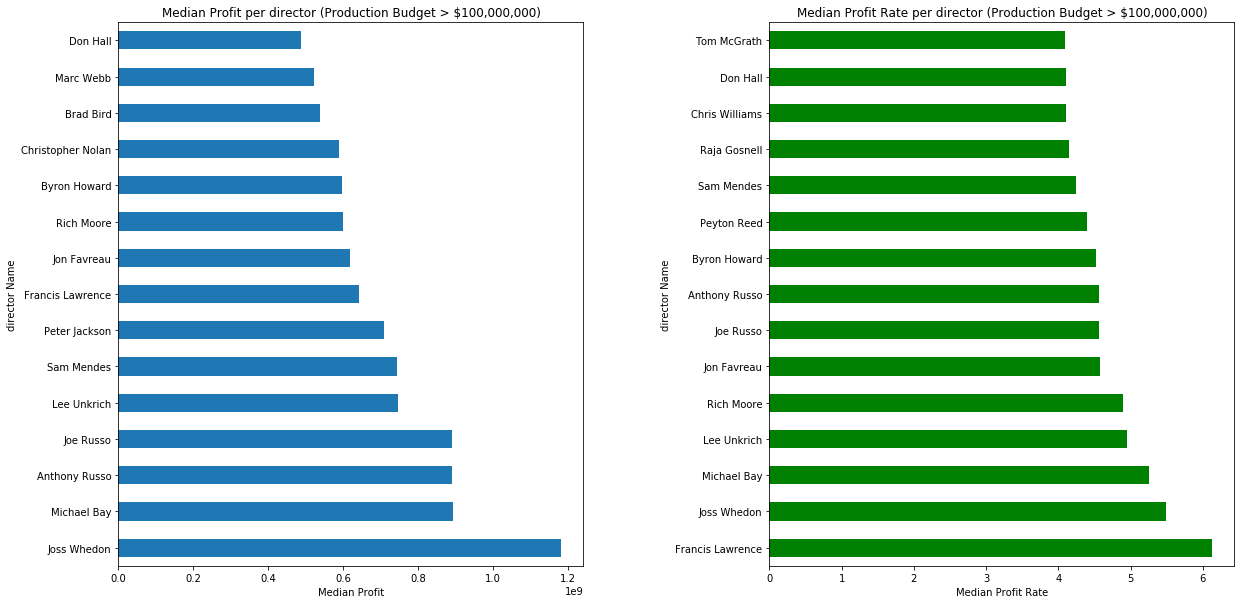

In [9]:
# Director, call function
categoryStudy(df2, 'director', 15, 10, 'high')

Total number: 110
Best writer List:  ['Jeff Pinkner', 'Michael Arndt', 'Jim Reardon', 'Linda Woolverton', 'Nicole Perlman', 'Meg LeFauve', 'Gary Scott Thompson', 'Zak Penn', 'Chris McKenna', 'Suzanne Collins', 'Phil Johnston', 'Erik Sommers', 'Derek Connolly']


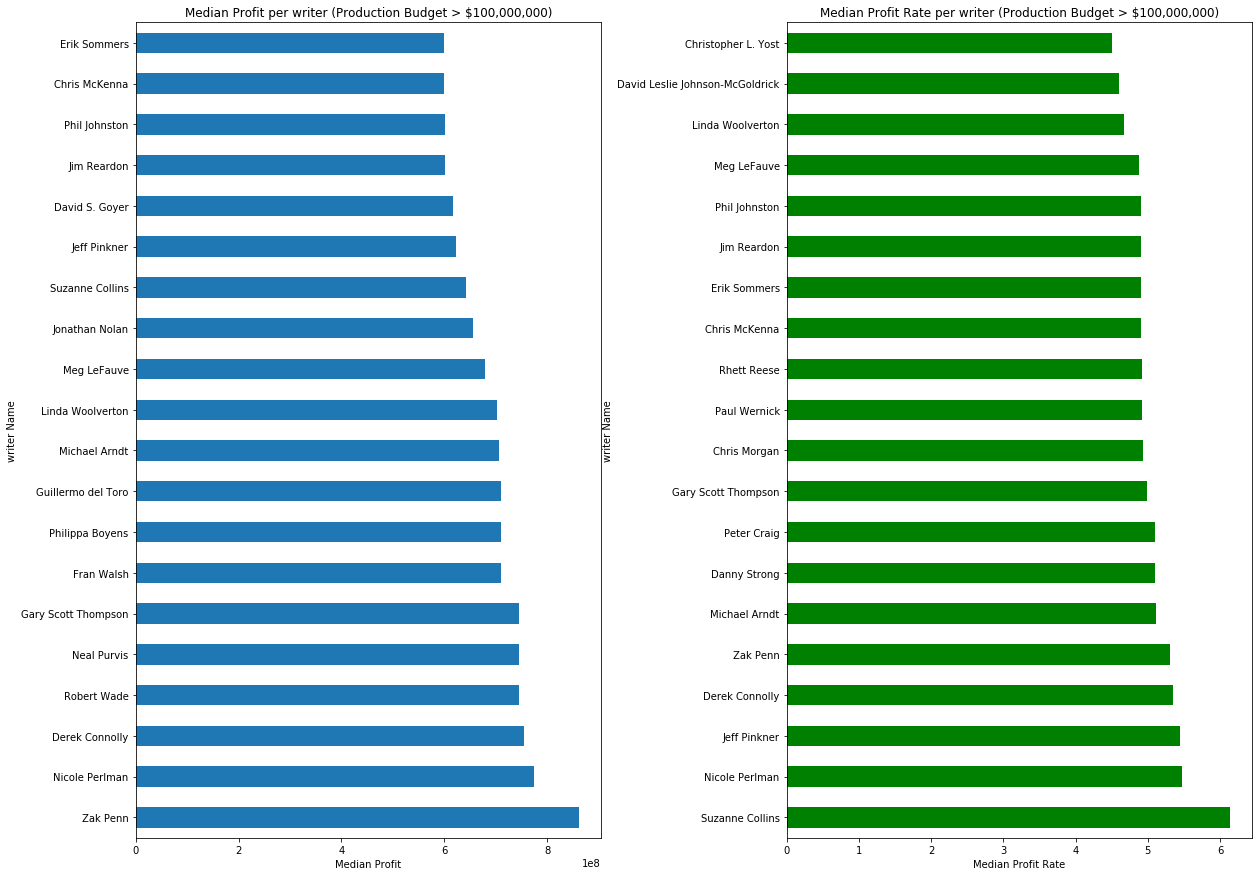

In [10]:
# Writer, , call function
categoryStudy(df2, 'writer', 20, 15, 'high')

In [38]:
df2[df2.primary_name == 'Cate Blanchett']

,category,primary_name,death_year,movie,production_budget,profit_gross,profit_rate,release_year
450,actress,Cate Blanchett,NaN,The Hobbit: The Battle of the Five Armies,250000000.0,695577621.0,3.782310,2014
769,actress,Cate Blanchett,NaN,Robin Hood,210000000.0,112459006.0,1.535519,2010
1657,actress,Cate Blanchett,NaN,Thor: Ragnarok,180000000.0,666980024.0,4.705445,2017
3883,actress,Cate Blanchett,NaN,How to Train Your Dragon 2,145000000.0,469586270.0,4.238526,2014
4875,actress,Cate Blanchett,NaN,How to Train Your Dragon: The Hidden World,129000000.0,390258283.0,4.025258,2019


## Q4: Which actors and actresses make the most profit?

Total number: 113
Best actor List:  ['Josh Duhamel', 'Chris Pratt', 'Robert Downey Jr.', 'Chris Hemsworth', 'Josh Hutcherson', 'Idris Elba', 'Vin Diesel', 'Mark Ruffalo', 'Chris Evans', 'Jason Momoa', 'Jeremy Renner', 'Javier Bardem', 'Josh Gad']


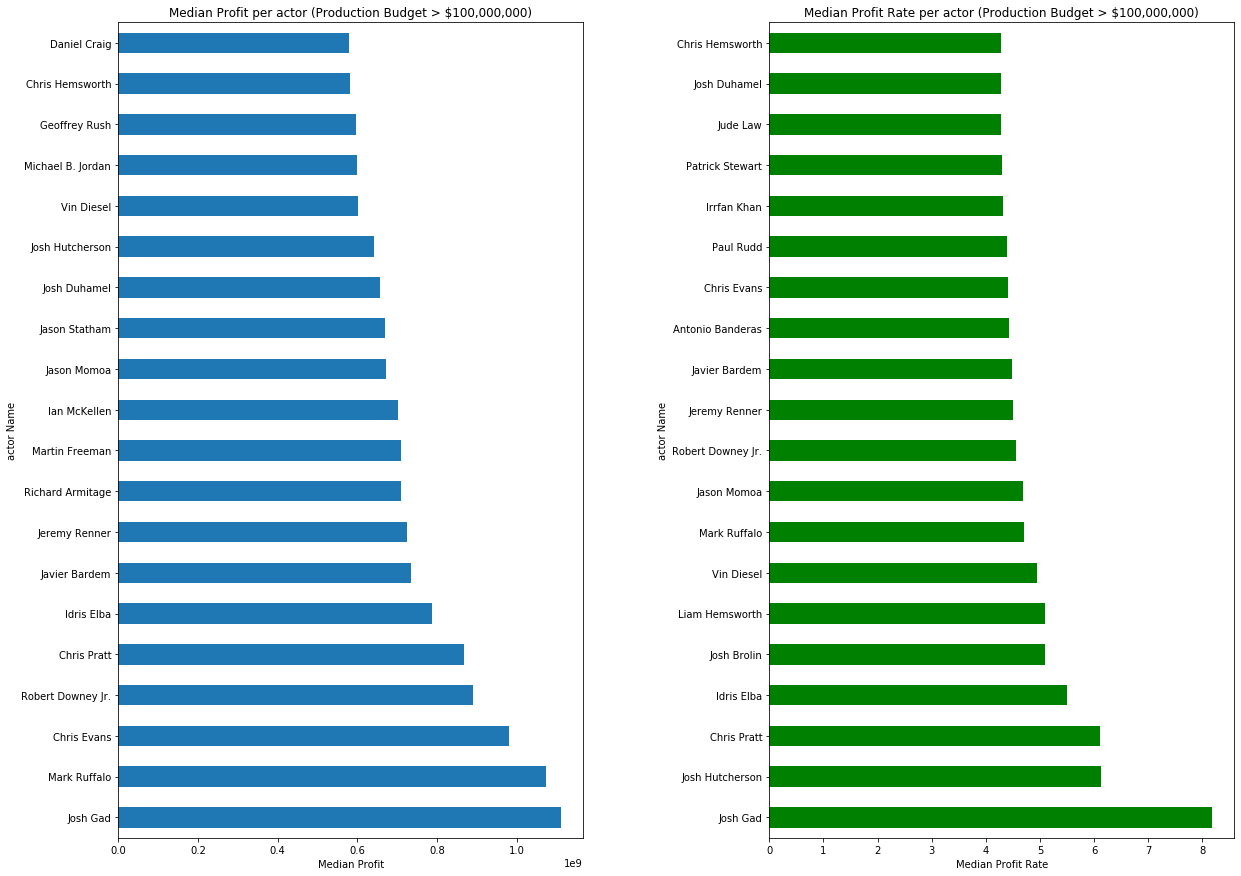

In [12]:
# Actor
categoryStudy(df2, 'actor', 20, 15, 'high')

Total number: 45
Best actress List:  ['Bryce Dallas Howard', 'Cate Blanchett', 'Anne Hathaway', 'Brie Larson', 'Scarlett Johansson', 'Naomie Harris', 'Michelle Williams', 'Katherine Waterston', 'Emma Watson', 'Gal Gadot', 'Jessica Chastain']


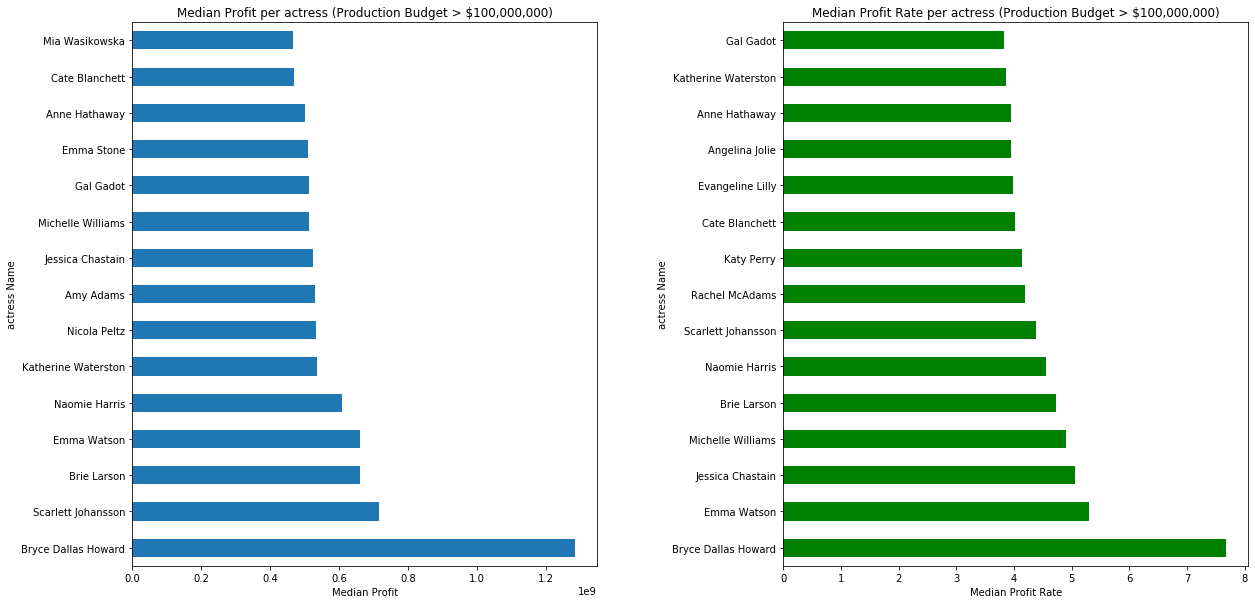

In [11]:
# Actress, call function
categoryStudy(df2, 'actress', 15, 10, 'high')

## Q5: Which genre brings highest profit?

In [24]:
# Copy dataframe with selected columns
selected_columns3 = ['movie', 'production_budget', 'genres', 'profit_gross', 'profit_rate', 'release_year']
df3 = df[selected_columns3].copy() ## Select columns

# Clean duplicates
df3.drop_duplicates(subset=None, keep='first', inplace=True)

#Select the movies with production_budget > $100,000,000
df3 = df3[(df3.production_budget > 100000000)]

#Drop the movies with release year before 2000
df3.drop(df3[df3.release_year < 1990].index, inplace=True)

print(df3.shape)
df3.head(20)

(632, 6)


,movie,production_budget,genres,profit_gross,profit_rate,release_year
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,Action,6.350639e+08,2.546673,2011
3,Pirates of the Caribbean: On Stranger Tides,410600000.0,Fantasy,6.350639e+08,2.546673,2011
4,Pirates of the Caribbean: On Stranger Tides,410600000.0,Adventure,6.350639e+08,2.546673,2011
30,Dark Phoenix,350000000.0,Adventure,-2.002376e+08,0.427892,2019
32,Dark Phoenix,350000000.0,Sci-Fi,-2.002376e+08,0.427892,2019
33,Dark Phoenix,350000000.0,Action,-2.002376e+08,0.427892,2019
60,Avengers: Age of Ultron,330600000.0,Sci-Fi,1.072414e+09,4.243841,2015
61,Avengers: Age of Ultron,330600000.0,Adventure,1.072414e+09,4.243841,2015
62,Avengers: Age of Ultron,330600000.0,Action,1.072414e+09,4.243841,2015
90,Avengers: Infinity War,300000000.0,Action,1.748134e+09,6.827114,2018


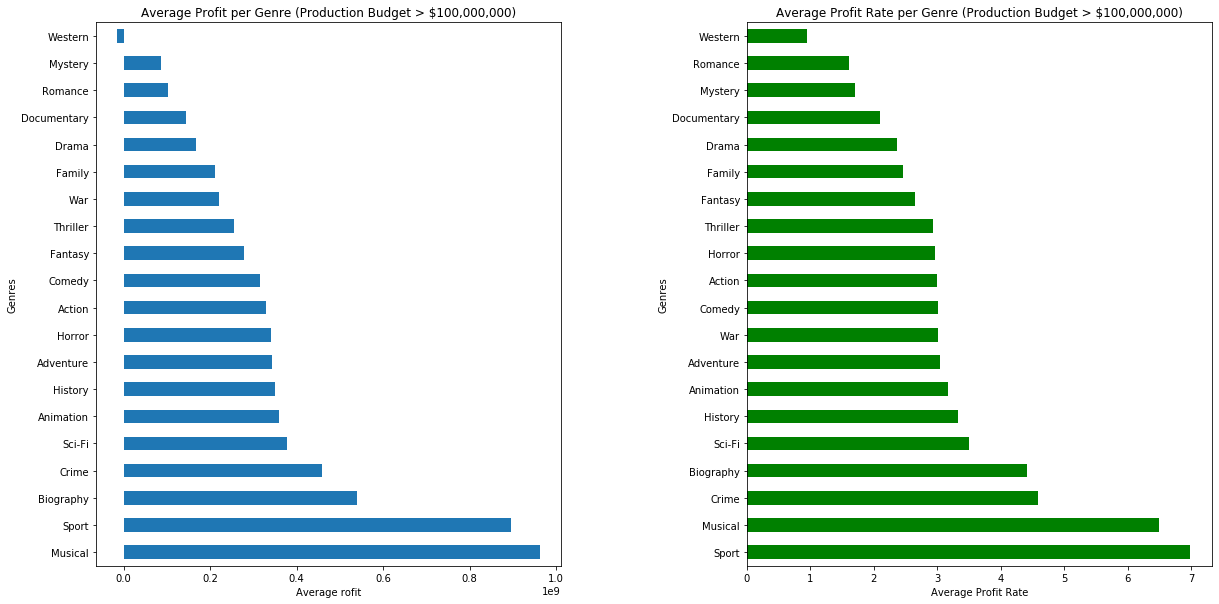

In [25]:
# Plot genres
genre_series1 = df3.groupby('genres')['profit_gross'].median().sort_values(ascending=False)
genre_series2 = df3.groupby('genres')['profit_rate'].median().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plt.subplots_adjust(wspace=0.4)

genre_series1.plot.barh(ax=axes[0])
axes[0].set_title('Average Profit per Genre (Production Budget > $100,000,000)')
axes[0].set_xlabel('Average rofit')
axes[0].set_ylabel('Genres')

genre_series2.plot.barh(ax=axes[1], color='green')
axes[1].set_title('Average Profit Rate per Genre (Production Budget > $100,000,000)')
axes[1].set_xlabel('Average Profit Rate')
axes[1].set_ylabel('Genres')

plt.savefig('figures/genres-profit1_highBudget.png')

In [26]:
df3.groupby('genres').count().sort_values(by='movie', ascending=False)

,movie,production_budget,profit_gross,profit_rate,release_year
genres,,,,,
Adventure,172,172,172,172,172
Action,137,137,137,137,137
Sci-Fi,60,60,60,60,60
Comedy,52,52,52,52,52
Animation,47,47,47,47,47
Fantasy,42,42,42,42,42
Drama,38,38,38,38,38
Family,27,27,27,27,27
Thriller,17,17,17,17,17


In [27]:
df3[df3.genres == 'Sport']

,movie,production_budget,genres,profit_gross,profit_rate,release_year
3148,Frozen,150000000.0,Sport,1.122470e+09,8.483133,2013
3301,Wonder Woman,150000000.0,Sport,6.711334e+08,5.474223,2017


In [28]:
# Select the popular genres names with higher number of movies
popular_genres = list(df3.groupby('genres').count().sort_values(by='movie', ascending=False)[0:9].index)
popular_genres

['Adventure',
 'Action',
 'Sci-Fi',
 'Comedy',
 'Animation',
 'Fantasy',
 'Drama',
 'Family',
 'Thriller']

In [29]:
# Filter the data for the popular genres
df3_pop = df3.loc[df3['genres'].isin(popular_genres)]
df3_pop

,movie,production_budget,genres,profit_gross,profit_rate,release_year
0,Pirates of the Caribbean: On Stranger Tides,410600000.0,Action,635063875.0,2.546673,2011
3,Pirates of the Caribbean: On Stranger Tides,410600000.0,Fantasy,635063875.0,2.546673,2011
4,Pirates of the Caribbean: On Stranger Tides,410600000.0,Adventure,635063875.0,2.546673,2011
30,Dark Phoenix,350000000.0,Adventure,-200237650.0,0.427892,2019
32,Dark Phoenix,350000000.0,Sci-Fi,-200237650.0,0.427892,2019
...,...,...,...,...,...,...
6337,Cloud Atlas,102000000.0,Drama,28673154.0,1.281109,2012
6338,Bumblebee,102000000.0,Action,363195589.0,4.560741,2018
6339,Bumblebee,102000000.0,Adventure,363195589.0,4.560741,2018
6340,Bumblebee,102000000.0,Sci-Fi,363195589.0,4.560741,2018


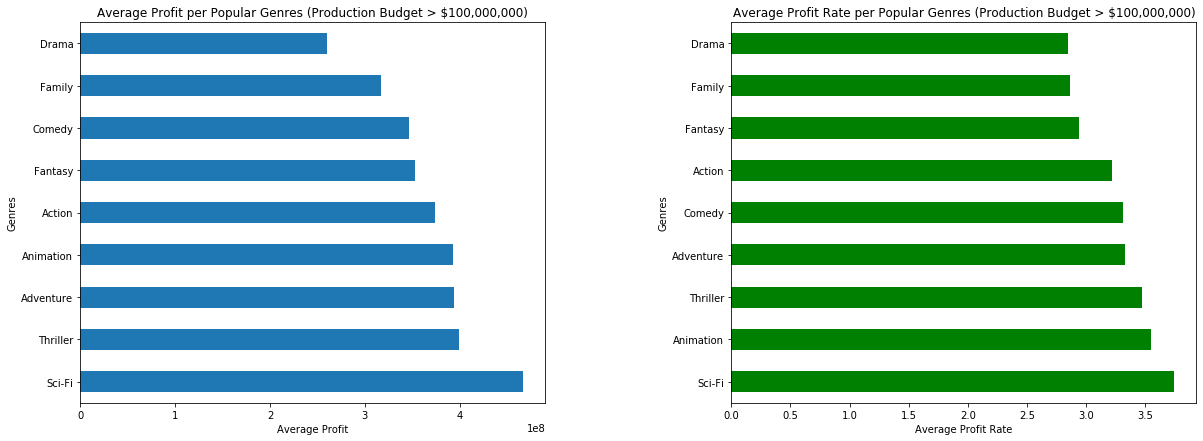

In [30]:
# plots for popular genres
genre_series1 = df3_pop.groupby('genres')['profit_gross'].mean().sort_values(ascending=False)
genre_series2 = df3_pop.groupby('genres')['profit_rate'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(20, 7))
plt.subplots_adjust(wspace=0.4)

genre_series1.plot.barh(ax=axes[0])
axes[0].set_title('Average Profit per Popular Genres (Production Budget > $100,000,000)')
axes[0].set_xlabel('Average Profit')
axes[0].set_ylabel('Genres')

genre_series2.plot.barh(ax=axes[1], color='green')
axes[1].set_title('Average Profit Rate per Popular Genres (Production Budget > $100,000,000)')
axes[1].set_xlabel('Average Profit Rate')
axes[1].set_ylabel('Genres')

plt.savefig('figures/genres-profit2_highBudget.png')